# Autoencoder

## Learning Objectives
- Architecture of Simple Autoencoder
- Applications
- Low-level Implementation in PyTorch (MNIST Digits dataset from torchvision for reconstruction)
- Visualize the Latent Space
- Different Types of Autoencoders: Convolutional, Variational, Deep, Denoising (Short overview - maybe more detailed description and implementation in following submodules)


## Prerequisites
- Neural Networks (FFN) -maybe also convolutional networks
- Feature Extraction
- Dimensionality Reduction
- Data Compression

## Intro
An autoencoder is a type of neural network that learns a representation of the input. Both __output__ $r$ and __input__ $x$ therefore have the same dimensions. However, the output representation $r$ is not a straightforward copy of the input $x$. The autoencoder learns to represent the input by reducing its dimensions to a smaller size, also called __code__ $h$. This code contains the most important features that are needed to represent the input correctly. Hence an autoencoder is an __unsupervised__ feature learner, which learns the code $h$ using __mapping functions__ $f(x)$ and $g(h)$, also called the **encoder** and **decoder** respectively.

## Architecture
<img src="images/simple_AE.png" title="Simple Autoencoder Architecture" style="width: 500px;"/> <br>
The base architecture of an autoencoder consists of three main parts: The encoder, code, and decoder.

- __Encoder__: A feedforward neural network. The input dimension depends on the data, but the important part here is that its output is smaller. This forces the autoencoder to learn the most important features from the input. It can be described as the mapping function $f(x)$ as it maps the input $x$ to the code $h$.
- __Code__: The reduced representation of the input, called code h where $h = f(x)$.
- __Decoder__: A feedforward neural network like the encoder. The only differences is that the input dimension is that of the code and the output dimension is that of the original input data because it decodes the code to the input again. It can be described as the mapping function $g(h)$ as it maps the code to a copy or representation of the input, s.t. $r = g(h)$.

The most simple version of an autoencoder is an undercomplete autoencoder. It has the objective to learn the most important features, which should be represented by the code. It does this by simply copying the input to the output.



## Applications
Autoencoders are useful for applications where the output is similar to the input such as machine translation, or computer vision tasks. Corrupted images can be denoised with autoencoders. After training, the decoder part can be used for image generation by sampling a code_h_. <br>
As autoencoders learn important features within the code _h_, the code can be extracted s.t. the autoencoders is a means for feature extraction by dimensionality reduction.

## Implementation
We will now implement and train an __undercomplete autoencoder__ on the MNIST digits dataset.
The objective of an undercomplete autoencoder is to merely copy the input as the output. This will give us the opportunity to examine the features in the code that the autoencoder deems important.

In [2]:
#load the necessary libraries
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils import get_dataloaders

In [3]:
#set up the autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_size, code_size, output_size):
        super().__init__()
        #the encoder should have as input size the size of each data sample and as output size the size of the code.
        #FFN using ReLu as activation function.
        self.encoder = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=code_size),
            nn.ReLU(True))
        #the decoder hould have as input size the size of the code and as output size the size of the each data sample.
        #Another FFN using ReLu as activation function. We want separate neural networks for encoder and decoder.
        self.decoder = nn.Sequential(
            nn.Linear(in_features=code_size, out_features=output_size),
            nn.ReLU(True))
        
    def forward(self, x):
        #The input x is fed into the encoder. The code h is then fed into the decoder.
        h = self.encoder(x)
        r = self.decoder(h)
        return r

In [4]:
#intialise the autoencoder model
model = Autoencoder(784, 128, 784) #make sure that output size = input size
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [5]:
batch_size = 128
epochs = 10

#Load the MNIST dataset
train_loader, val_loader, test_loader = get_dataloaders(batch_size=batch_size)

In [6]:
#train the model batchwise
for epoch in range(epochs):
    loss = 0
    for batch, _ in train_loader:
        input = batch.view(-1, 784) #reshape
        
        optimizer.zero_grad()      
        outputs = model(input)
        train_loss = criterion(outputs, input) #target is the original input
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    
    loss = loss / len(train_loader)
    print("Epoch : {}/{}, loss = {:.4f}".format(epoch + 1, epochs, loss))

Epoch : 1/10, loss = 0.0237
Epoch : 2/10, loss = 0.0120
Epoch : 3/10, loss = 0.0107
Epoch : 4/10, loss = 0.0102
Epoch : 5/10, loss = 0.0099
Epoch : 6/10, loss = 0.0098
Epoch : 7/10, loss = 0.0096
Epoch : 8/10, loss = 0.0096
Epoch : 9/10, loss = 0.0095
Epoch : 10/10, loss = 0.0095


### Reconstruct Test Images
Now that we trained our autoencoder, let's see how the output compares to the input on some test samples. The upper row shows the original input images and the lower row shows the reconstructed images of the decoder based on the code.

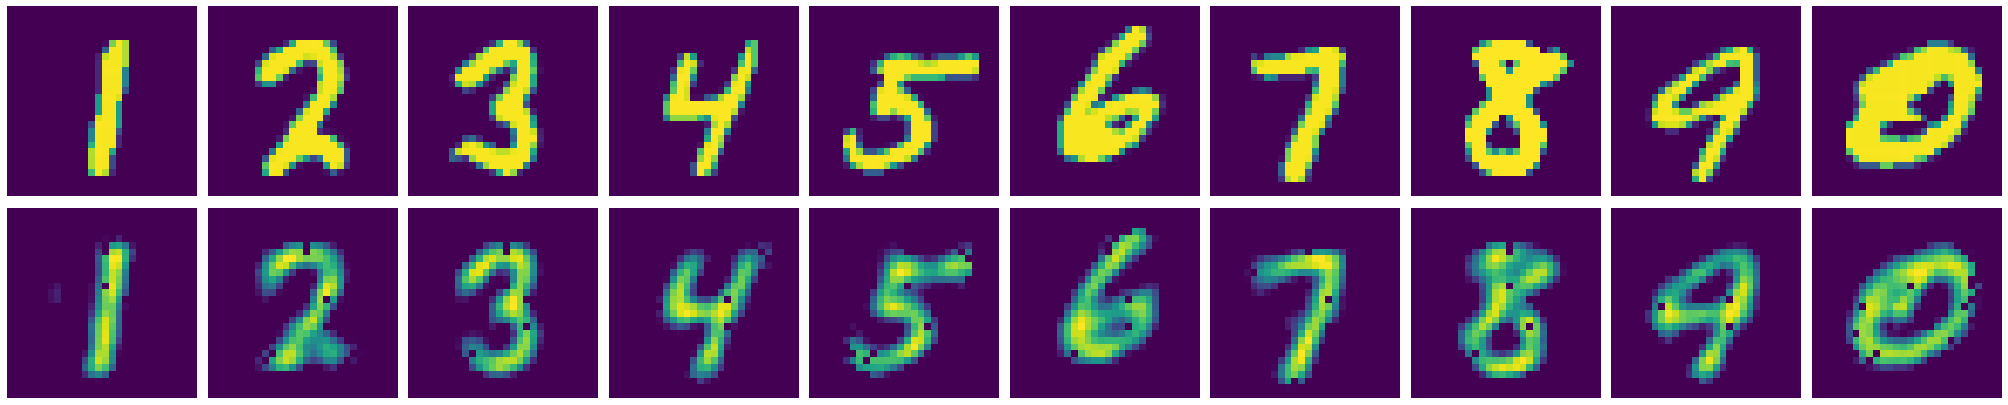

In [38]:
#Plot reconstructed pictures of some test examples
model.eval()
for batch, _ in test_loader:
    input = batch.view(-1, 784) #reshape    
    test_outputs = model(input) #feed the batches through the autoencoder

def plot_input(x,y):
    axarr[x,y].imshow(batch[i][0].detach().numpy())
    axarr[x,y].axis('off')

def plot_output(x,y):
    axarr[x,y].imshow(torch.reshape(test_outputs[i][:], shape=[-1,28,28]).detach().numpy()[0])
    axarr[x,y].axis('off')   

f, axarr = plt.subplots(2,10, figsize=(28,28))
for i in range(10):
    plot_input(0,i)
    plot_output(1,i)
    
f.tight_layout()
plt.subplots_adjust(bottom=0.3, top=0.5, hspace=0)
plt.show(f)

## Latent Space
### Exercise: Code Size
Now let's look at the effect of the code size.
Play around with higher and lower dimensions of the code size and report how it affects the visualised output. You should create a new instance of the model for this.
You can also add more layers to the encoder and decoder to iteratively decrease and increase the dimensions.

In [3]:
#YOUR CODE HERE

### Latent Space Visualisation
We will now plot the decoder output to a random code $h$ to see the features that are deemed important by the autoencoder.

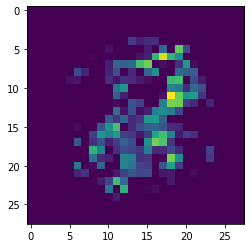

In [74]:
sample_code = torch.rand(128) #Create a random tensor within the space of code h
sample_output = model.decoder(sample_code) #Only feed it through the decoder
plt.imshow(torch.reshape(sample_output, shape=[-1,28,28]).detach().numpy()[0])

## Different Types of Autoencoders

### Convolutional AEs
For computer vision tasks, convolutional autoencoders are particularly suitable. In this setting, the the linear layers in the encoder are replaced by convolutional layers. The code $h$ is produced by flattening the pooled output of the convolutional layers. The decoder works in a reverse way by using tranpose (de-)convolutional layers that upsample the convolutional windows.

<img src="images/conv_autoencoder.png" title="Convolutional Autoencoder Architecture" style="width: 500px;"/>
(https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590_Deep_Clustering_with_Convolutional_Autoencoders/links/5a2ba172aca2728e05dea395/Deep-Clustering-with-Convolutional-Autoencoders.pdf)

### Denoising AEs
A denoising autoencoders follows the same architecture as a simple autoencoder built of feed-forward neural networks. The only difference lies in the input, which is corrupted by manually adding noise. Here, the autoencoder learns to remove noise from the input and therefore learns a robust presentation of it rather than just a copy as can be the case in an undercomplete autoencoder.

<img src="images/denoising_autoencoder.png" title="Denoising Autoencoder Architecture" style="width: 500px;"/>
(https://www.pyimagesearch.com/2020/02/24/denoising-autoencoders-with-keras-tensorflow-and-deep-learning/)

### Variational AEs
When visualising a random code from the latent space, the decoded image did not actually resemble a digit. Variational autoencoders overcome this problem by changing the encoder output. Instead of a specific tensor within the latent space, now the encoder outputs a probability distribution over the latent space. This is a great alternaitive for generative model purposes. They also use a different loss function as the objective has changed here.<br>
If now you want to know how to build a more complex version of an autoencoder, you can follow this [tutorial](https://www.tensorflow.org/tutorials/generative/cvae) to build a convolutional variational autoencoder!

## Summary
Autoencoders that are trained on the right data with the right autoencoder architecture are often used to generate data. After training, we use the latent space as well as the decoder. But also the encoder can be valuable on its own, for example for dimensionality reduction and feature extraction. This is particularly useful in feature spaces of very high dimensions as, unlike traditional techniques such as PCA, autoencoders can learn non-linear relations.